In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

merged_data = pd.read_csv("C:/Users/anujb/Downloads/Fitness_Classes_Data/Fitness Classes Data/cleaned/Cleaned_Data.csv")

#ensuring the data is in a time series format
merged_data.rename(columns={'BookingEndDateTime (Day/Month/Year)': 'BookingDate'}, inplace=True)
merged_data['BookingDate'] = pd.to_datetime(merged_data['BookingDate'], dayfirst=True)
merged_data.set_index('BookingDate', inplace=True)

#bookings in one day
daily_bookings = merged_data.resample('D')['Number Booked'].sum()

print(daily_bookings.head())

BookingDate
2018-04-01    223
2018-04-02    296
2018-04-03    973
2018-04-04    905
2018-04-05    695
Freq: D, Name: Number Booked, dtype: int64


In [3]:
from prophet import Prophet
prophet_data = daily_bookings.reset_index().rename(columns={'BookingDate': 'ds', 'Number Booked': 'y'})
model = Prophet()
model.fit(prophet_data)

19:24:28 - cmdstanpy - INFO - Chain [1] start processing
19:24:28 - cmdstanpy - INFO - Chain [1] done processing


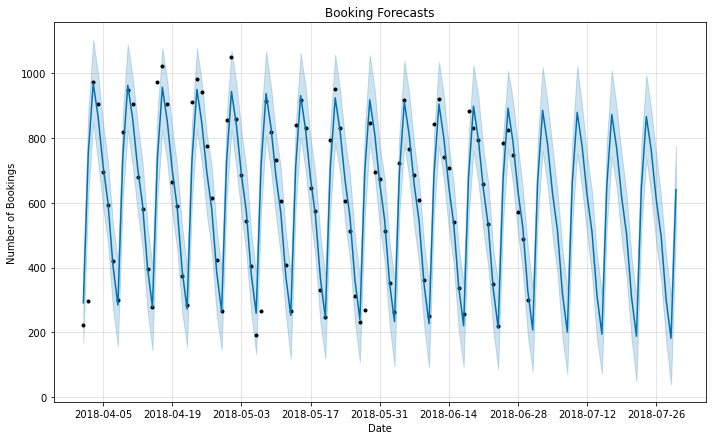

Mean Absolute Error (MAE): 56.165003421048254
Mean Squared Error (MSE): 10323.652722547926


In [4]:
#future dataframe for predictions
future = model.make_future_dataframe(periods=30) #forecast for next 30 days

#generate forecasts
forecast = model.predict(future)

#plot
fig = model.plot(forecast)
plt.title('Booking Forecasts')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()

#calculate performance metrics on historical data
actual = prophet_data['y'].values
predicted = forecast.loc[forecast['ds'].isin(prophet_data['ds']), 'yhat'].values

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")